<a href="https://colab.research.google.com/github/Sonica-B/Deep-Learning-CS541_F2024/blob/HomeWork4/homework4(b)_Shreya_Boyane_Ankit_Gole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

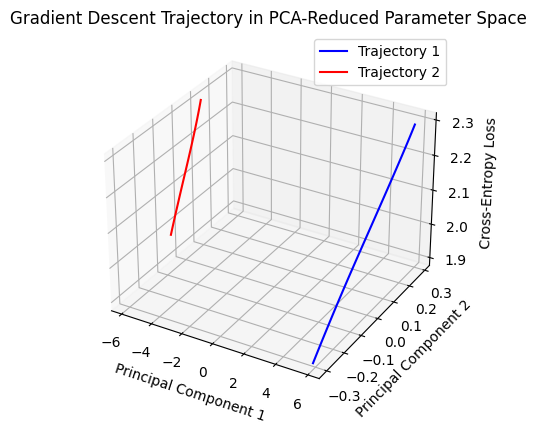

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a simple FCNN
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # example for MNIST with flattened 28x28 images
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Training setup
def train_and_log_params(model, data, targets, optimizer, criterion, num_steps=100):
    params_over_time = []
    losses_over_time = []

    for step in range(num_steps):
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        # Log parameters and loss at each step
        params = torch.cat([p.flatten() for p in model.parameters()]).detach().cpu().numpy()
        params_over_time.append(params)
        losses_over_time.append(loss.item())

    return np.array(params_over_time), losses_over_time

# Initialize data (dummy data for demonstration)
data = torch.randn(64, 784)  # batch of 64, flattened 28x28 images
targets = torch.randint(0, 10, (64,))  # random targets for 10 classes

# Run two training trajectories from different initializations
trajectories = []
losses = []
for _ in range(2):
    model = FCNN()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()
    params, loss_values = train_and_log_params(model, data, targets, optimizer, criterion)
    trajectories.append(params)
    losses.append(loss_values)

# Perform PCA on the stacked parameters from both trajectories
all_params = np.vstack(trajectories)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(all_params)

# Split PCA components back into individual trajectories
pca_trajectory_1 = pca_components[:len(trajectories[0])]
pca_trajectory_2 = pca_components[len(trajectories[0]):]

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each trajectory with its respective cross-entropy loss
ax.plot(pca_trajectory_1[:, 0], pca_trajectory_1[:, 1], losses[0], label='Trajectory 1', color='blue')
ax.plot(pca_trajectory_2[:, 0], pca_trajectory_2[:, 1], losses[1], label='Trajectory 2', color='red')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Cross-Entropy Loss')
plt.legend()
plt.title("Gradient Descent Trajectory in PCA-Reduced Parameter Space")
plt.show()


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define FCNN
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Load Fashion MNIST (only 1000 samples)
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_loader = torch.utils.data.DataLoader(datasets.FashionMNIST('.', train=True, download=True, transform=transform),
                                           batch_size=1000, shuffle=True)
data_iter = iter(train_loader)
images, labels = next(data_iter)


def train_and_log_params(model, data, targets, optimizer, criterion, num_steps=50):
    params_over_time = []
    losses_over_time = []

    for step in range(num_steps):
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        # Collect parameter vector
        params = torch.cat([p.view(-1) for p in model.parameters()]).detach().cpu().numpy()
        params_over_time.append(params)
        losses_over_time.append(loss.item())
    return np.array(params_over_time), losses_over_time

# Run SGD twice for different trajectories
trajectories = []
losses = []
for _ in range(2):
    model = FCNN()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()
    params, loss_values = train_and_log_params(model, images, labels, optimizer, criterion)
    trajectories.append(params)
    losses.append(loss_values)


In [13]:
from sklearn.decomposition import PCA

# Stack parameter vectors from both trajectories for PCA
all_params = np.vstack(trajectories)
pca = PCA(n_components=2)
pca.fit(all_params)

# Project each trajectory into the 2D space of the first two principal components
pca_trajectory_1 = pca.transform(trajectories[0])
pca_trajectory_2 = pca.transform(trajectories[1])


Text(0.5, 0.92, 'Gradient Descent Trajectories in PCA-Reduced Parameter Space')

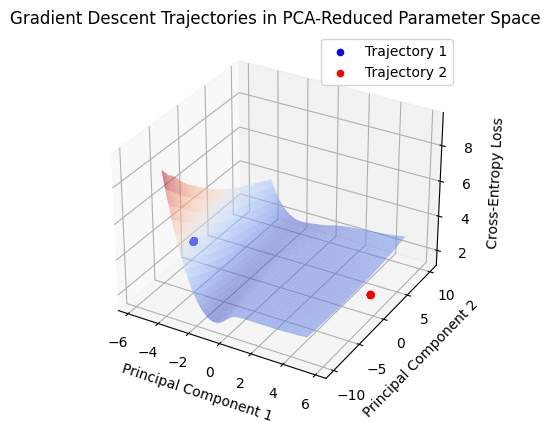

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(grid_y, grid_x, grid_losses, cmap='coolwarm', alpha=0.5)

# Plot SGD trajectories with loss as the z-axis
ax.scatter(pca_trajectory_1[:, 0], pca_trajectory_1[:, 1], losses[0], label='Trajectory 1', color='blue')
ax.scatter(pca_trajectory_2[:, 0], pca_trajectory_2[:, 1], losses[1], label='Trajectory 2', color='red')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Cross-Entropy Loss')
plt.legend()
plt.title("Gradient Descent Trajectories in PCA-Reduced Parameter Space")


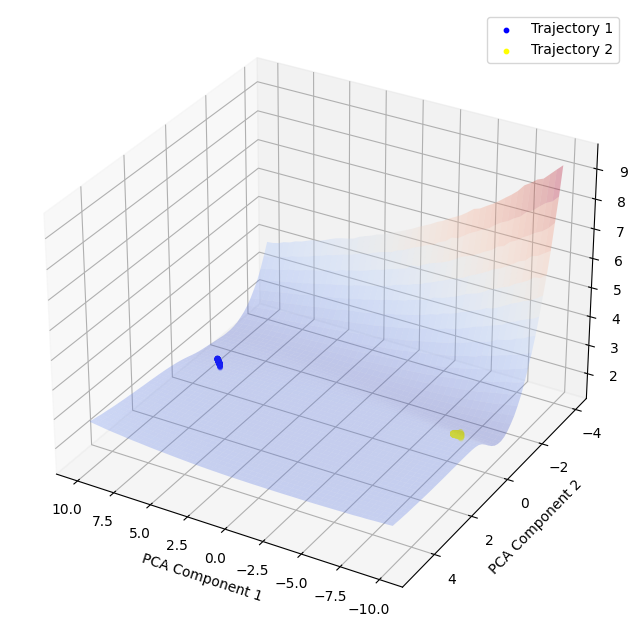

In [17]:
# Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(grid_x, grid_y, grid_losses, cmap='coolwarm', alpha=0.3)

# Plot the SGD trajectories
ax.scatter(trajectory1_pca[:, 0], trajectory1_pca[:, 1], losses1, c='blue', s=10, label='Trajectory 1')
ax.scatter(trajectory2_pca[:, 0], trajectory2_pca[:, 1], losses2, c='yellow', s=10, label='Trajectory 2')

# Set labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('Train Loss')
ax.view_init(elev=30, azim=120)  # Adjust view angle if needed
plt.legend()
plt.show()